#Analisis Klasifikasi

#1. Import Library dan File csv

In [ ]:
#1. Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
#Load file CSV-nya
telecom_df = pd.read_csv("telecom_churn.csv")

In [ ]:
telecom_df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [ ]:
#Cek missing values
telecom_df.isnull().sum()

state                            0
account_length                   0
area_code                        0
phone_number                     0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
class                            0
dtype: int64

In [ ]:
#Cek isi data
telecom_df.head(5)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


#2. Melakukan Exploratory Data Analysis (EDA)

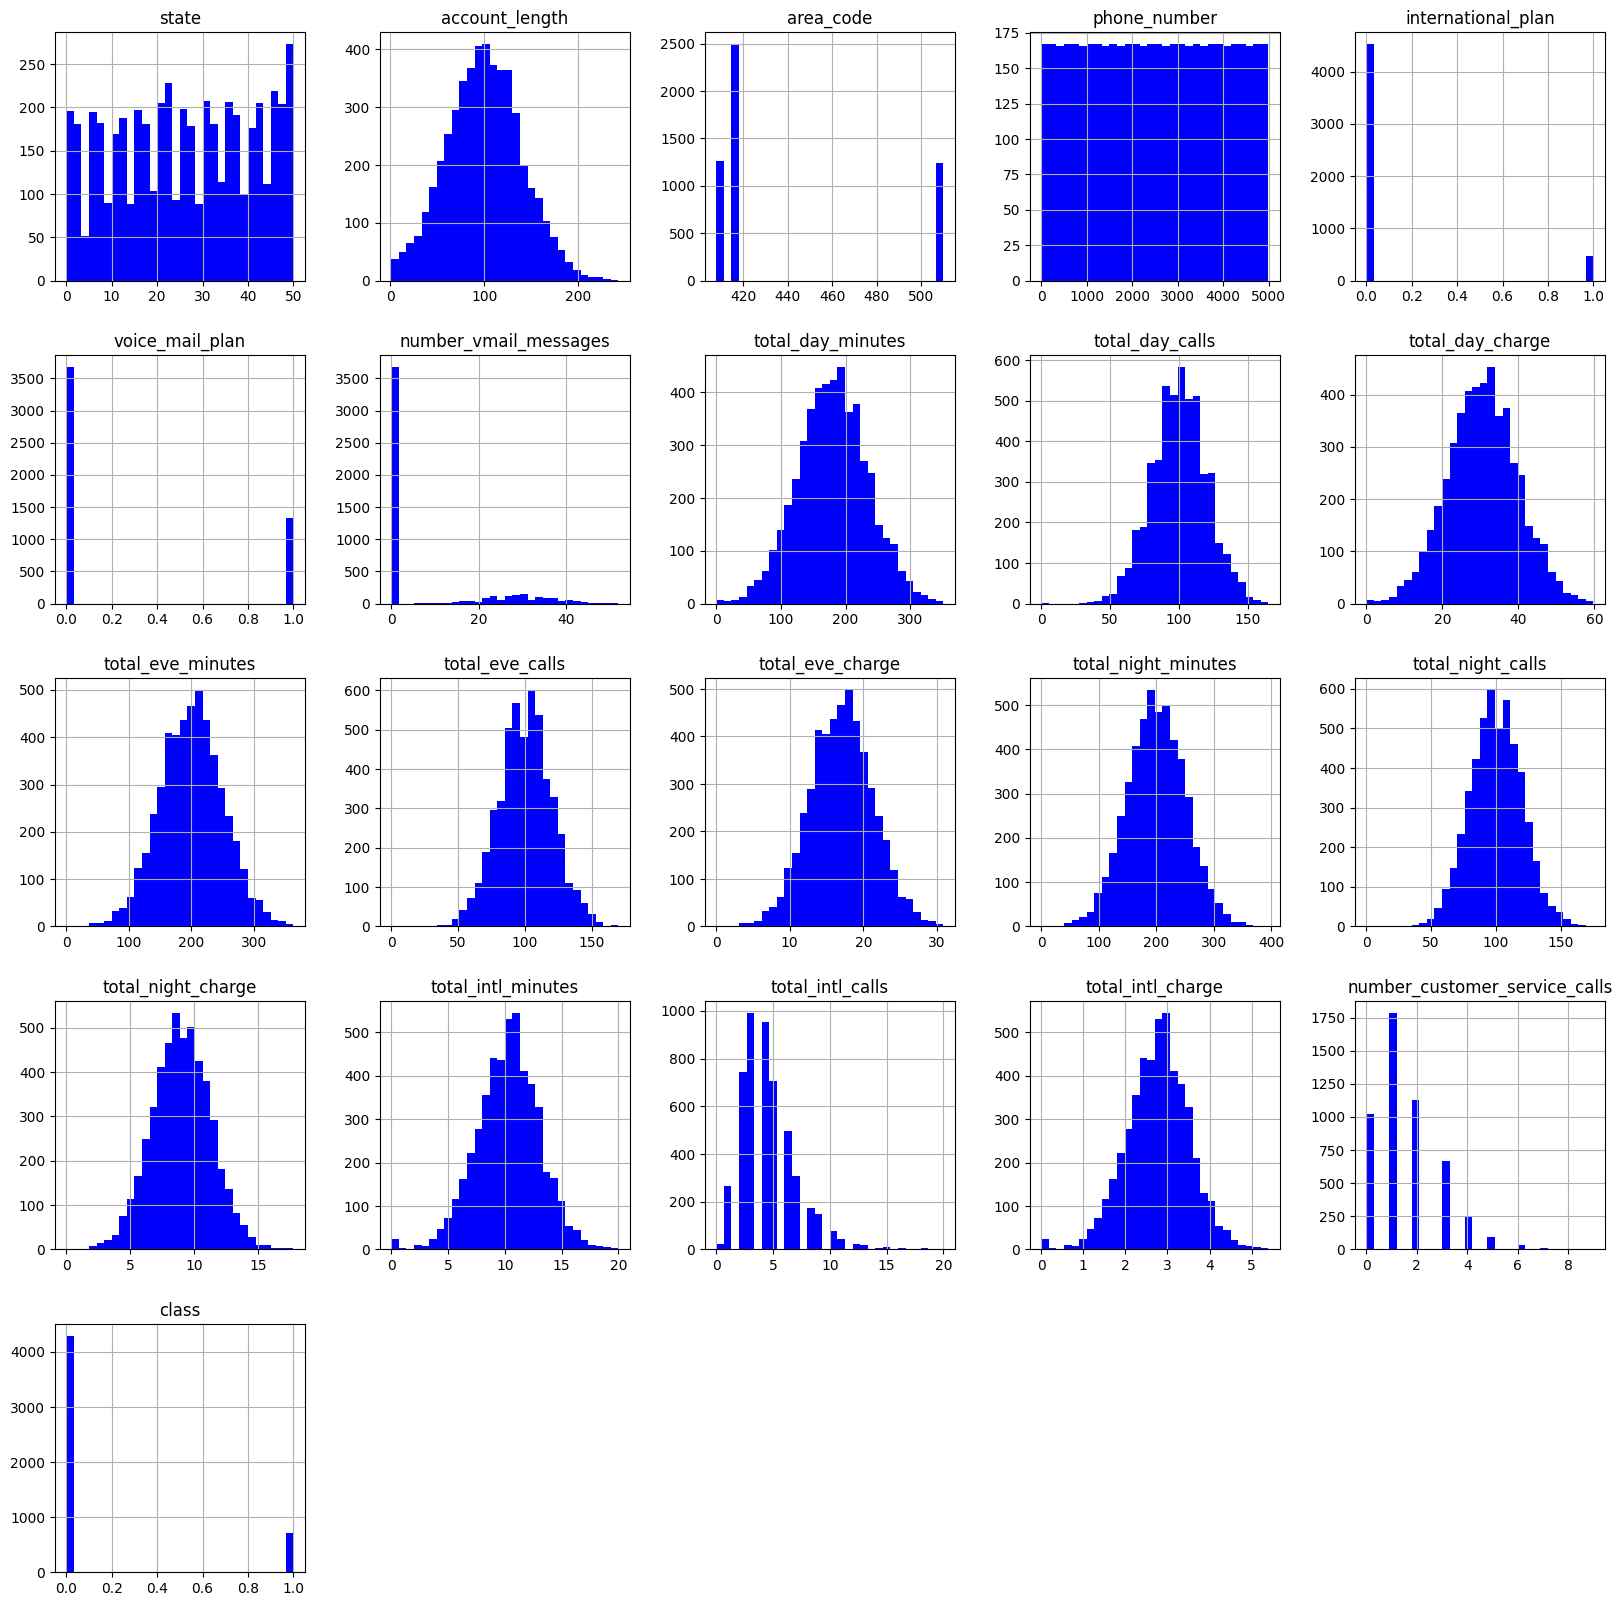

In [ ]:
#Membuat histogram
telecom_df.hist(bins = 30, figsize = (20, 20), color = 'b');

<Axes: >

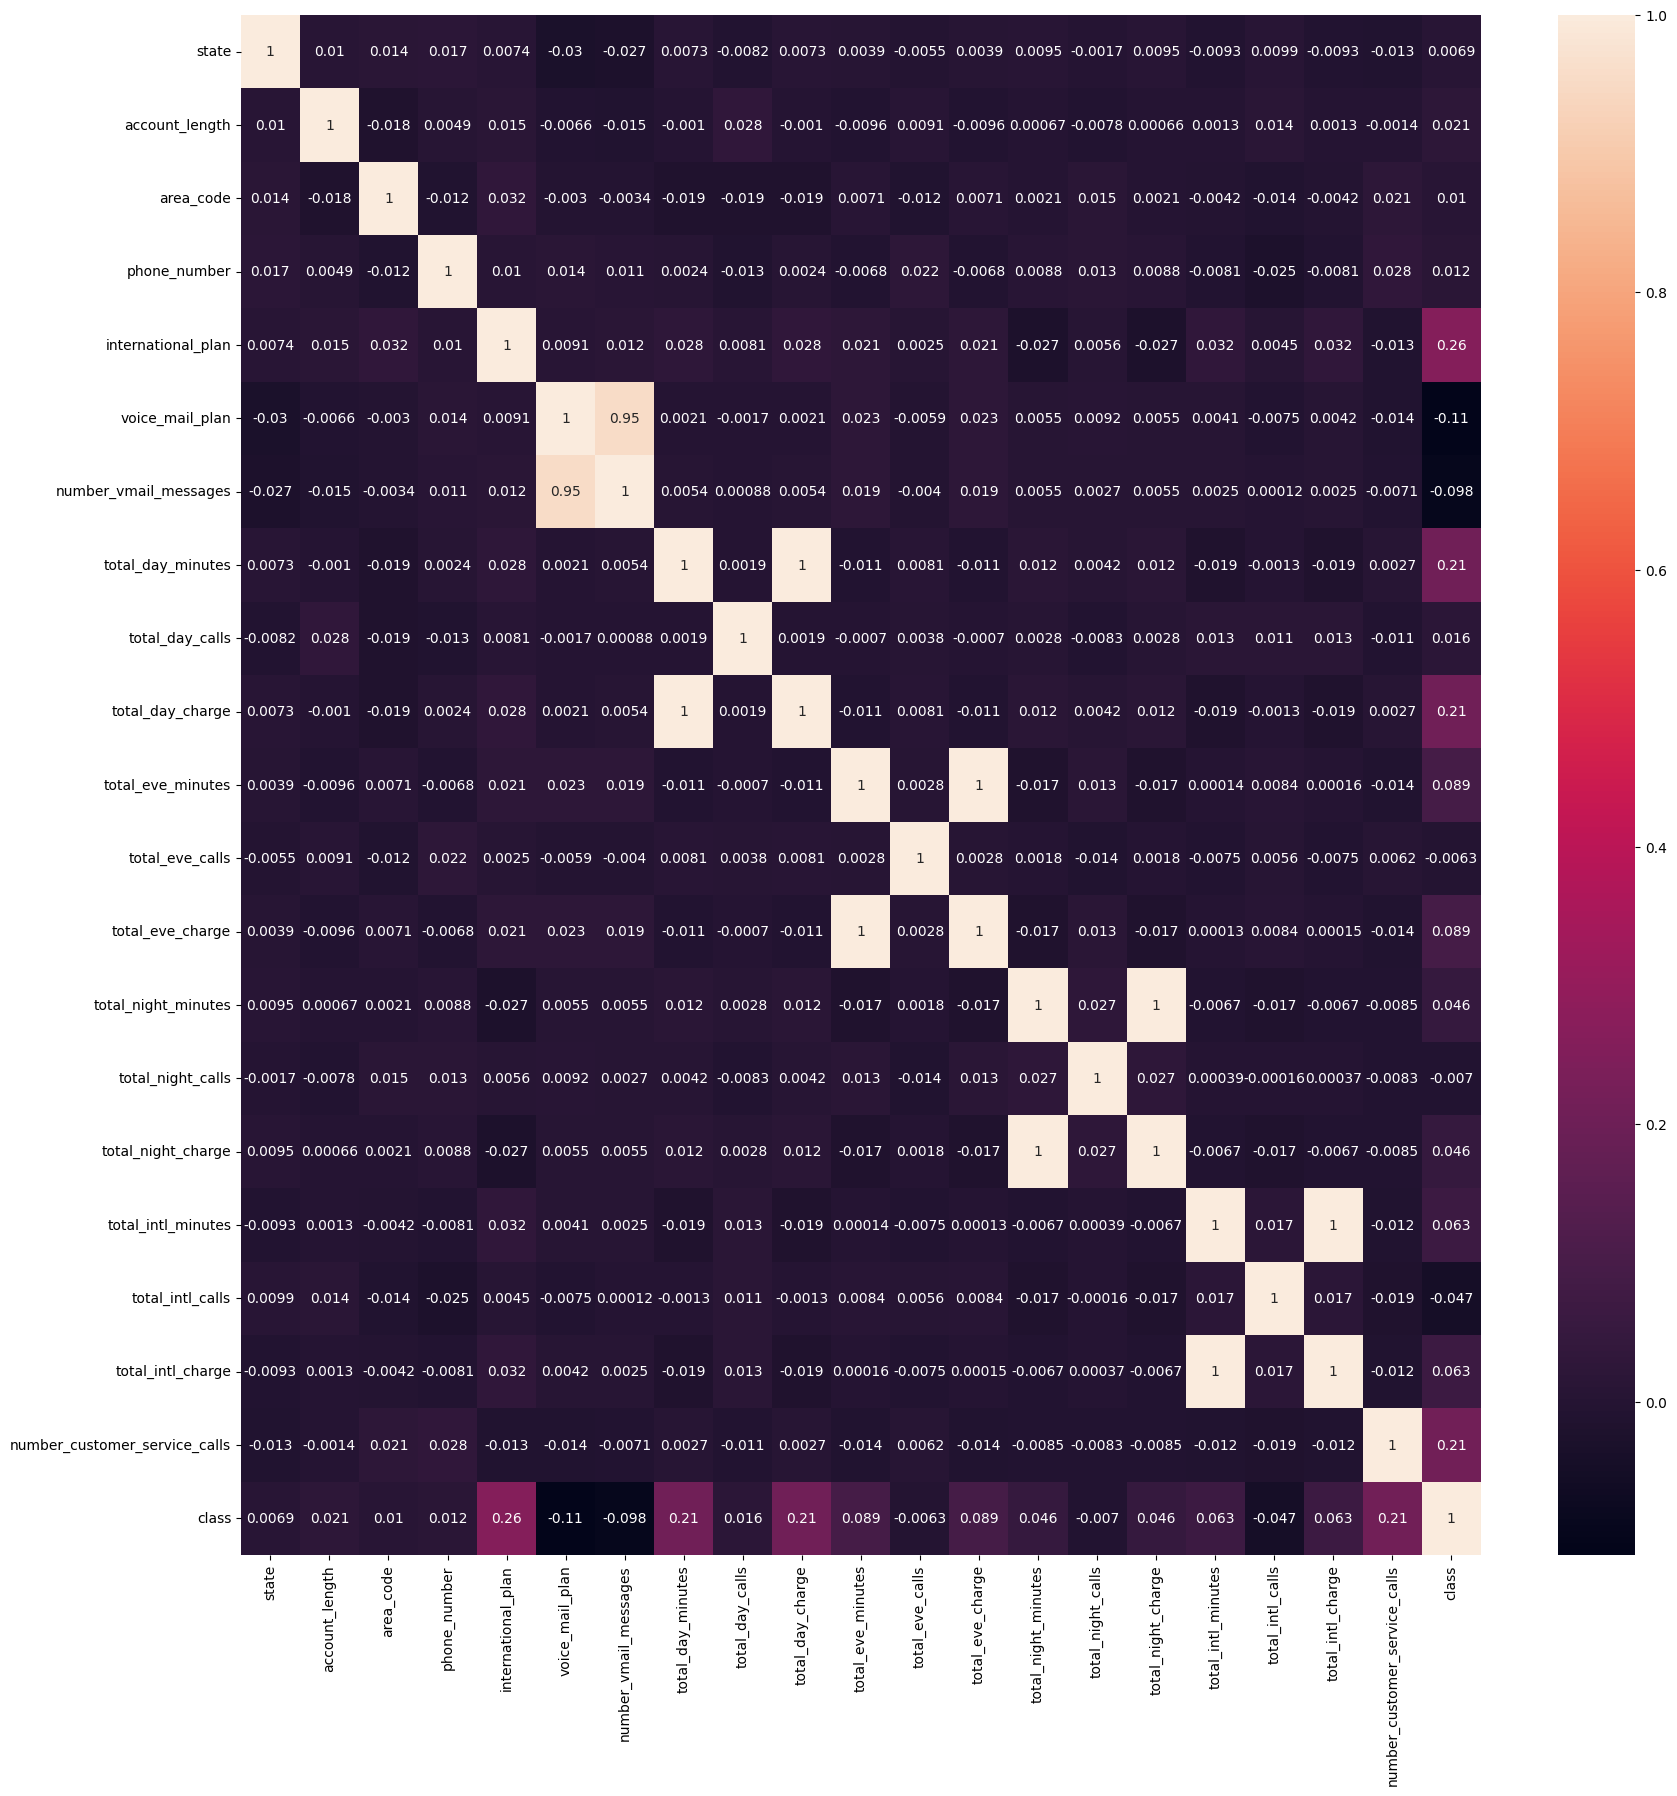

In [ ]:
#Membuat matriks korelasi
plt.figure(figsize = (20,20))
corr_matrix = telecom_df.corr()
sns.heatmap(corr_matrix, annot = True)

<Axes: ylabel='count'>

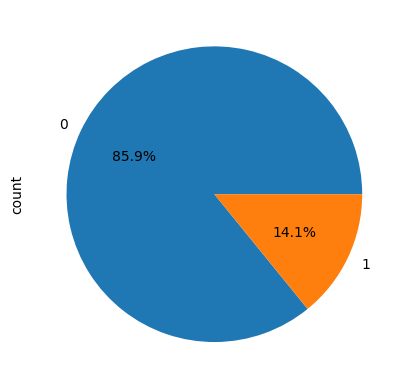

In [ ]:
#Melihat perbandingan value pada 'class'
telecom_df['class'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<ipython-input-10-115891b56e40>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom_df.total_day_minutes[(telecom_df["class"] == 0)],
<ipython-input-10-115891b56e40>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(telecom_df.total_day_minutes[(telecom_df["class"] == 1)],


Text(0.5, 1.0, 'Distribution of total day minutes by churn')

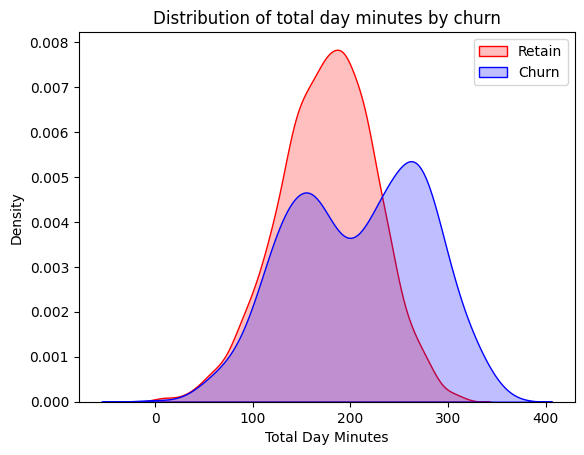

In [ ]:
#Churn berdasarkan total day calls
ax = sns.kdeplot(telecom_df.total_day_minutes[(telecom_df["class"] == 0)],
               color = "Red", shade = True)
ax = sns.kdeplot(telecom_df.total_day_minutes[(telecom_df["class"] == 1)],
               color = "Blue", shade = True)

ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Total Day Minutes")
ax.set_title("Distribution of total day minutes by churn")

#3. Melakukan analisis menggunakan Random Forest Classifier

In [ ]:
#Import data ke variabel
X = telecom_df.drop(["class", "area_code", "phone_number"], axis = "columns")
#area_code dan phone_number didrop karena tidak relevan, justru akan merusak data
y = telecom_df["class"]

In [ ]:
#Melakukan pembagian data train dan data test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 90)

In [ ]:
X_train.shape

(3750, 18)

In [ ]:
X_test.shape

(1250, 18)

In [ ]:
#Import Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [ ]:
#Feature_Importance merupakan fungsi untuk mengetahui tingkat penting/tidaknya kolom tsb
#Makin mendekati 1 makin penting
rf.feature_importances_

array([0.02369506, 0.02876449, 0.07449892, 0.02107982, 0.02551731,
       0.14537222, 0.02894894, 0.15743699, 0.06099319, 0.02512349,
       0.06585764, 0.03773667, 0.02570807, 0.03688897, 0.0354079 ,
       0.05545954, 0.04366861, 0.10784217])

In [ ]:
X.columns

Index(['state', 'account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls'],
      dtype='object')

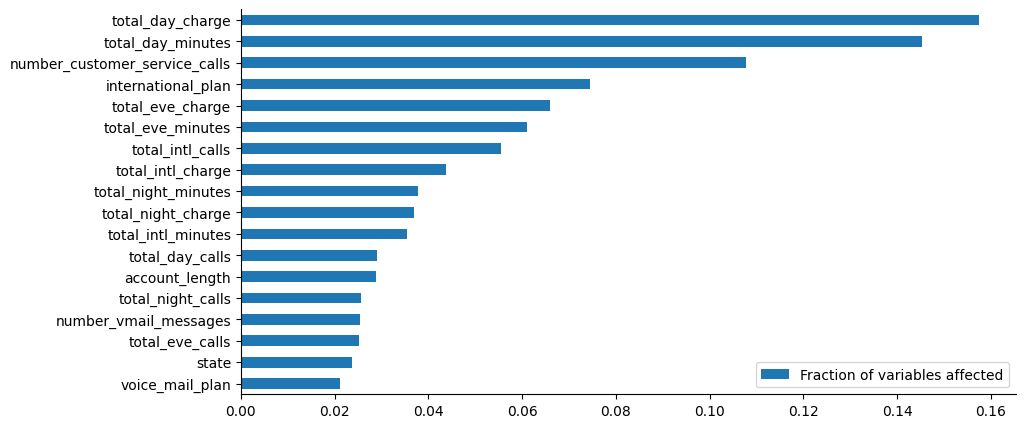

In [ ]:
#Membuat plot feature importance

feat_scores= pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (10, 5))
sns.despine()

#4. Logistic Regression untuk analisis klasifikasi

In [ ]:
#Import Library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_predict = model_LR.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Menentukan precision, recall, f1-score dan support
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1057
           1       0.48      0.07      0.12       193

    accuracy                           0.84      1250
   macro avg       0.67      0.53      0.52      1250
weighted avg       0.80      0.84      0.79      1250



In [ ]:
#Membuat confusion matrix
c_m = confusion_matrix(y_test, y_predict)
c_m

array([[1043,   14],
       [ 180,   13]])

<Axes: >

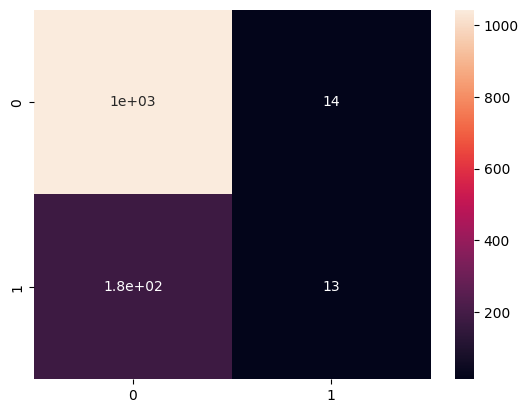

In [ ]:
#Visualisasikan dalam bentuk heatmap
sns.heatmap(c_m, annot=True)

#5. Support Vector Machine (SVM) untuk analisis klasifikasi

In [ ]:
#SVM merupakan model yang menggunakan Max Hyperplane Line
#untuk membagi klasifkasi
#Import Library
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC

model_svc = LinearSVC(max_iter=100000)
model_svm = CalibratedClassifierCV(model_svc)
model_svm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


CalibratedClassifierCV(estimator=LinearSVC(max_iter=100000))

In [ ]:
y_predict = model_svm.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1057
           1       0.53      0.12      0.19       193

    accuracy                           0.85      1250
   macro avg       0.70      0.55      0.56      1250
weighted avg       0.81      0.85      0.80      1250



<Axes: >

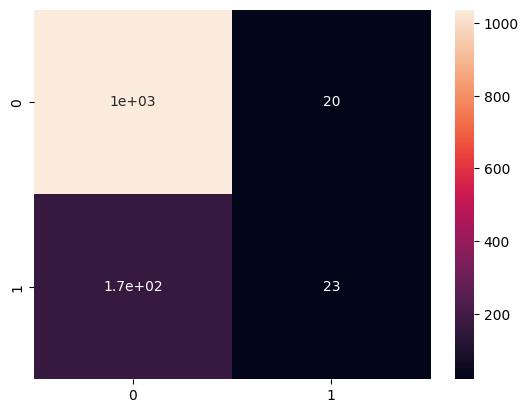

In [ ]:
c_m = confusion_matrix(y_test, y_predict)
sns.heatmap(c_m, annot=True)

#6. Random Forest Classifier untuk analisis klasifikasi

In [ ]:
#Metode menggunakan decision tree
#Import Library
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_predict = model_rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1057
           1       0.91      0.74      0.81       193

    accuracy                           0.95      1250
   macro avg       0.93      0.86      0.89      1250
weighted avg       0.95      0.95      0.95      1250



<Axes: >

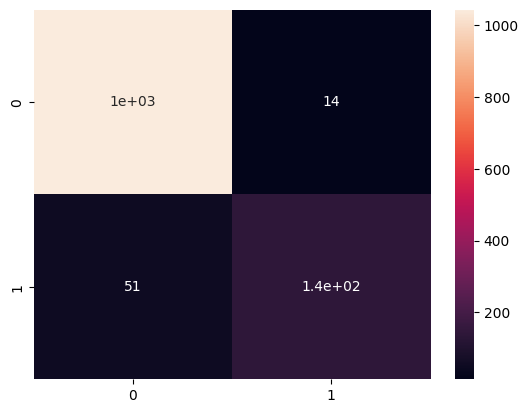

In [ ]:
c_m = confusion_matrix(y_test, y_predict)
sns.heatmap(c_m, annot=True)

#7. K-Nearest Neighbour (KNN) untuk analisis klasifikasi

In [ ]:
#Metode menggunakan jarak Euclidean
#Import library
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_predict = model_knn.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1057
           1       0.65      0.21      0.32       193

    accuracy                           0.86      1250
   macro avg       0.76      0.60      0.62      1250
weighted avg       0.84      0.86      0.83      1250



<Axes: >

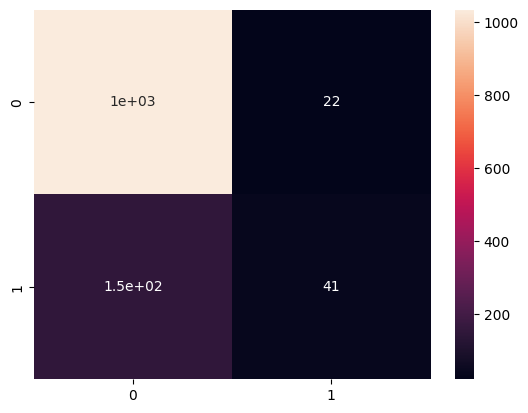

In [ ]:
c_m = confusion_matrix(y_test, y_predict)
sns.heatmap(c_m, annot=True)

#8. Naive Bayes untuk analisis klasifikasi

In [ ]:
#Metode menggunakan teorema bayes; likelihood, prior probability, marginal likelihood
#Import library
from sklearn.naive_bayes import GaussianNB

model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_predict = model_gnb.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1057
           1       0.59      0.50      0.54       193

    accuracy                           0.87      1250
   macro avg       0.75      0.72      0.73      1250
weighted avg       0.86      0.87      0.86      1250



<Axes: >

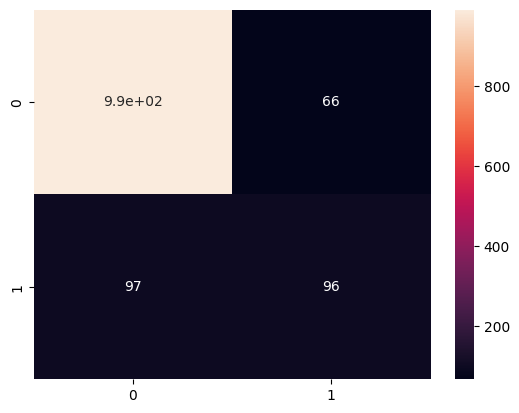

In [ ]:
c_m = confusion_matrix(y_test, y_predict)
sns.heatmap(c_m, annot=True)

#9. Plot Kurva ROC (membandingkan seluruh metode)

In [ ]:
# Kurva ROC
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_gnb.predict_proba(X_test)[:, 1], pos_label = 1)

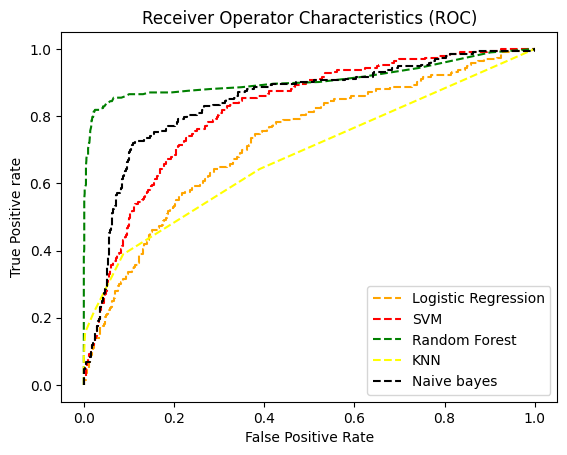

In [ ]:
#Visualisasikan
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "black", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

In [ ]:
#Area Under Curve

from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])

print("Logistic Regression: ", auc_score1) # Logistic Regression
print("Support Vector Machine: ", auc_score2) # Support Vector Machine
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes

Logistic Regression:  0.7263885961343327
Support Vector Machine:  0.8168979563825668
Random Forest:  0.908625447914471
K-Nearest Neighbors:  0.6807540159116867
Naive Bayes:  0.8435399826471438
